In [1]:
# import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [2]:
# import data
diabetes_df = pd.read_csv("diabetes_clean.csv")
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [5]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768, 1)


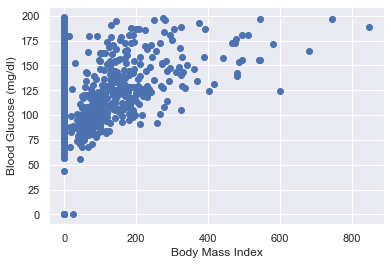

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

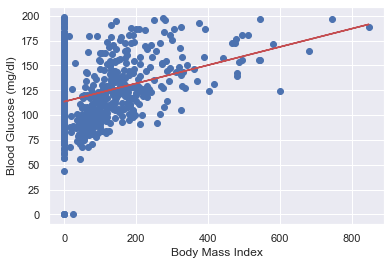

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y, c= "b")
plt.plot(X_bmi, predictions, c="r")
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [9]:
reg_all.score(X_test, y_test)

0.2828046881037516

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

26.341459582232257

<AxesSubplot:xlabel='glucose', ylabel='Count'>

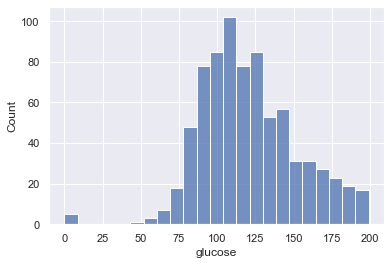

In [11]:
sns.histplot(data=diabetes_df["glucose"])

In [12]:
# cross validation
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [13]:
print(cv_results)

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


In [14]:
print(np.mean(cv_results), np.std(cv_results))

0.31909697867344783 0.07015320610114201


In [15]:
# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

[0.24088592 0.41580685]


## Ridge Regression

In [16]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.282846662322222, 0.28320633574804754, 0.2853000732200003, 0.26423984812668133, 0.1929242469410093, 0.1768272855049814]


## Lasso

In [20]:
# Import Ridge
from sklearn.linear_model import Lasso
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
lasso_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  lasso = Lasso(alpha=alpha)
  
  # Fit the data
  lasso.fit(X_train, y_train)
  
  # Obtain R-squared
  score = lasso.score(X_test, y_test)
  lasso_scores.append(score)
print(lasso_scores)

[0.2857532569482625, 0.29795609755827845, 0.17989838789273882, 0.10438614467572016, 0.04044144424693341, -2.3516854773975027e-05]


### Feature importance

In [22]:
names = diabetes_df.drop("glucose", axis=1).columns

[-0.40402074  0.11406488 -0.28396674  0.09134391  0.33226837  0.
  0.48960536 23.63264431]


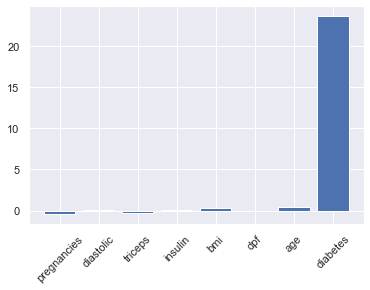

In [24]:
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()